# Environmental construction

In [1]:
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
#Unix commands
import os

# import useful tools
from glob import glob
from PIL import Image
import cv2

# import data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs

# import data augmentation
import albumentations as albu

# import math module
import math

# Loading data

In [2]:
default_path = '/kaggle/input/house-prices-advanced-regression-techniques'

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# Checking data statistics

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


* Let's see how many different category variables there are

In [6]:
# display the MSZoning of the training data without duplicates
print(train['MSZoning'].drop_duplicates())

0           RL
8           RM
30     C (all)
47          FV
341         RH
Name: MSZoning, dtype: object


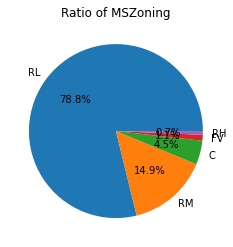

In [7]:
# Draw a pie chart about MSZoning.
plt.pie(train['MSZoning'].value_counts(),labels=['RL', 'RM', 'C', 'FV', 'RH'],autopct="%.1f%%")
plt.title("Ratio of MSZoning")
plt.show()

In [8]:
# display the Street of the training data without duplicates
print(train['Street'].drop_duplicates())

0     Pave
52    Grvl
Name: Street, dtype: object


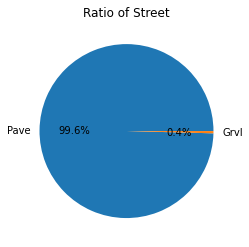

In [9]:
# Draw a pie chart about Street.
plt.pie(train['Street'].value_counts(),labels=['Pave', 'Grvl'],autopct="%.1f%%")
plt.title("Ratio of Street")
plt.show()

In [10]:
# display the Alley of the training data without duplicates
print(train['Alley'].drop_duplicates())

0      NaN
21    Grvl
30    Pave
Name: Alley, dtype: object


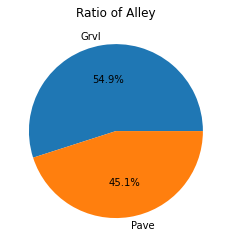

In [11]:
# Draw a pie chart about Alley.
plt.pie(train['Alley'].value_counts(),labels=['Grvl', 'Pave'],autopct="%.1f%%")
plt.title("Ratio of Alley")
plt.show()

In [12]:
# display the LotShape of the training data without duplicates
print(train['LotShape'].drop_duplicates())

0      Reg
2      IR1
12     IR2
264    IR3
Name: LotShape, dtype: object


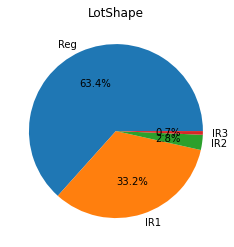

In [13]:
# Draw a pie chart about LotShape.
plt.pie(train['LotShape'].value_counts(),labels=['Reg', 'IR1', 'IR2', 'IR3'],autopct="%.1f%%")
plt.title("LotShape")
plt.show()

* Each of the typical types of categorical variables are not very numerous and are not likely to exceed five

# Focusing on Correlations

* Let's start with a simple idea and look at the correlation between area and price. In other words, we'll make the inference that the larger the house, the higher the price will be.

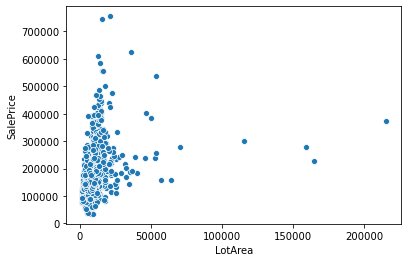

In [14]:
# Show the correlation between age and FVC in the training data
sns.scatterplot(data=train, x='LotArea', y='SalePrice')

* If it's tilted to the upper right, then you can say that there is a correlation. 
* Apparently there are some outliers.

* Replace categorical variables with numbers to analyze correlations

In [15]:
#Conversion of category variables to arbitrary values
train['MSZoning'] = train['MSZoning'].map({'RL': 0, 'RM': 1, 'C': 2, 'FV': 3,'RH': 4})
train['Street'] = train['Street'].map({'Pave': 0, 'Grvl': 1})
train['Alley'] = train['Alley'].map({'Pave': 0, 'Grvl': 1})
train['LotShape'] = train['LotShape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})

In [16]:
df_corr = train.corr()
print(df_corr)

                     Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.007830    -0.010601 -0.033226   
MSSubClass     0.011156    1.000000  0.292874    -0.386347 -0.139781   
MSZoning      -0.007830    0.292874  1.000000    -0.253742 -0.162680   
LotFrontage   -0.010601   -0.386347 -0.253742     1.000000  0.426095   
LotArea       -0.033226   -0.139781 -0.162680     0.426095  1.000000   
Street        -0.008916    0.024969 -0.005266     0.040886  0.197131   
Alley          0.011337   -0.369373 -0.642847     0.379265  0.437644   
LotShape      -0.024071   -0.115361 -0.163076     0.231878  0.315484   
OverallQual   -0.028365    0.032628  0.007895     0.251646  0.105806   
OverallCond    0.012609   -0.059316 -0.014729    -0.059213 -0.005636   
YearBuilt     -0.012713    0.027850 -0.041280     0.123349  0.014228   
YearRemodAdd  -0.021998    0.040581  0.052785     0.088866  0.013788   
MasVnrArea    -0.050298    0.022936 -0.032910     0.193458  0.10

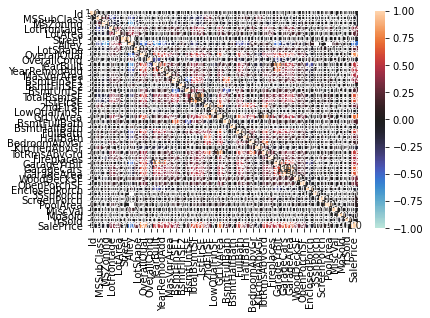

In [17]:
corr_mat = train.corr(method='pearson')
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:Displays values in a grid
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

# TO be continued